In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import geopandas as gpd
from shapely.geometry import Point
import shapely
import numpy as np
import matplotlib.pyplot as plt

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/Crime_Edited.xlsx', sheet_name = '2017')
#data = pd.read_excel('C:\\Users\\vns8\\Documents\\Crime_Edited.xlsx', sheet_name = '2017')
data = data.loc[data["Crime Name1"] != "Not a Crime"]
data = data.drop(columns = ["Police District Number","Address Number","Victims","CR Number","NIBRS Code","Beat","PRA","State","Incident ID","Offence Code","Sector"])
ugh = list(map(str, data["Start Time"]))
for i in range (0, len(ugh)):
    ugh[i] = ugh[i][:2]
data["Start Time"] = ugh
ugh = (list(map(str,data['Start Date'])))
ughh = []
for i in range(0,len(ugh)):
    ugh[i] = ugh[i][5:]
    ugh[i] = ugh[i][:5]
data['Start Date'] = ugh

In [3]:
zipcodes = gpd.read_file('/Users/VarshiniSelvadurai/Documents/Internship/mczipcodes.shp')
#zipcodes = gpd.read_file('C:\\Users\\vns8\\Documents\\mczipcodes\\mczipcodes.shp')

# Blue Map --> Montgomery County by Zipcode
# Chloropleth Map --> Number of Crime Incidents per Zipcode in 2017

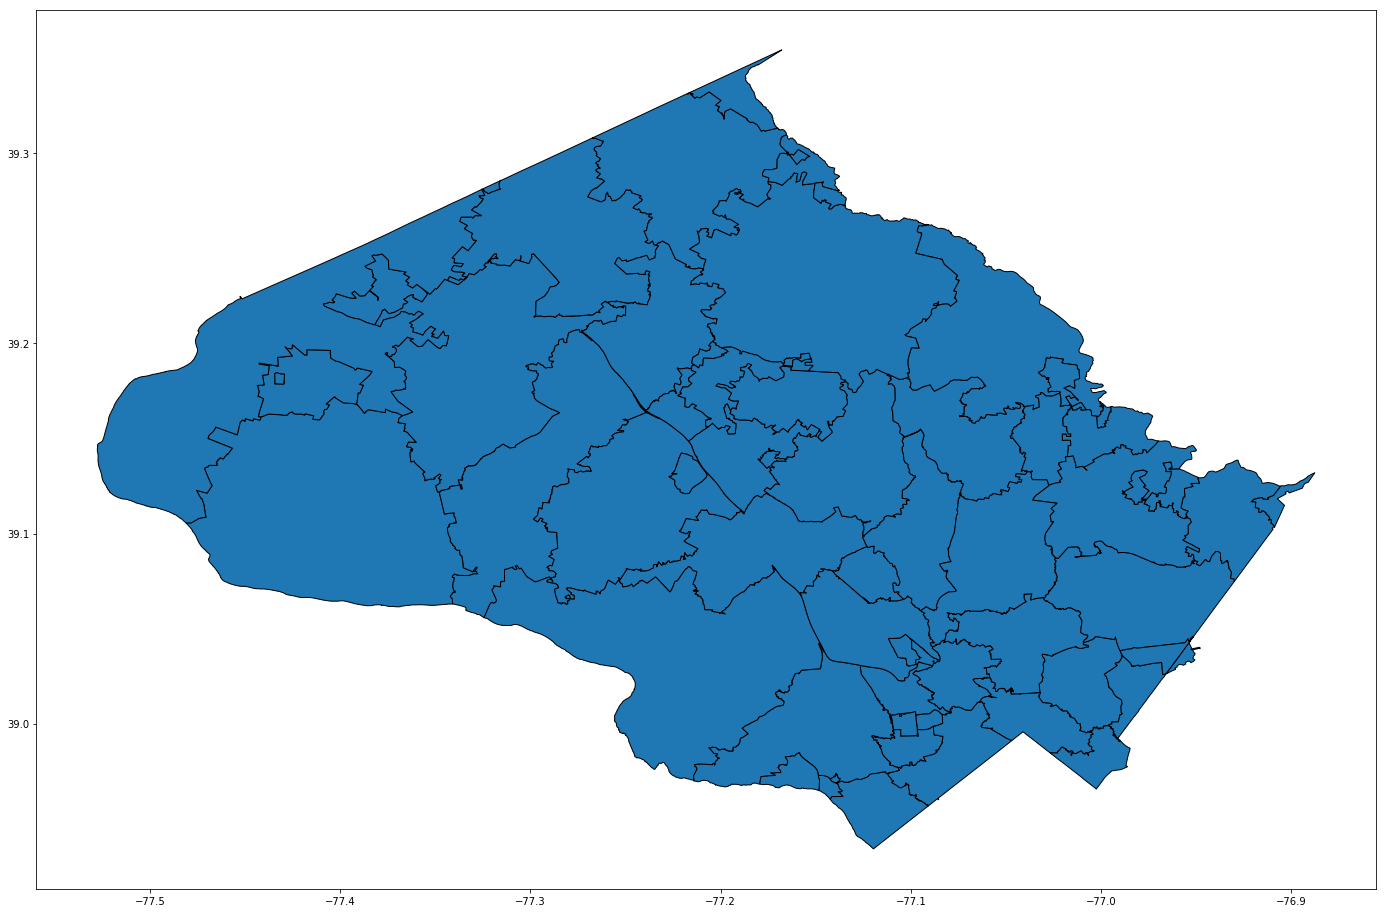

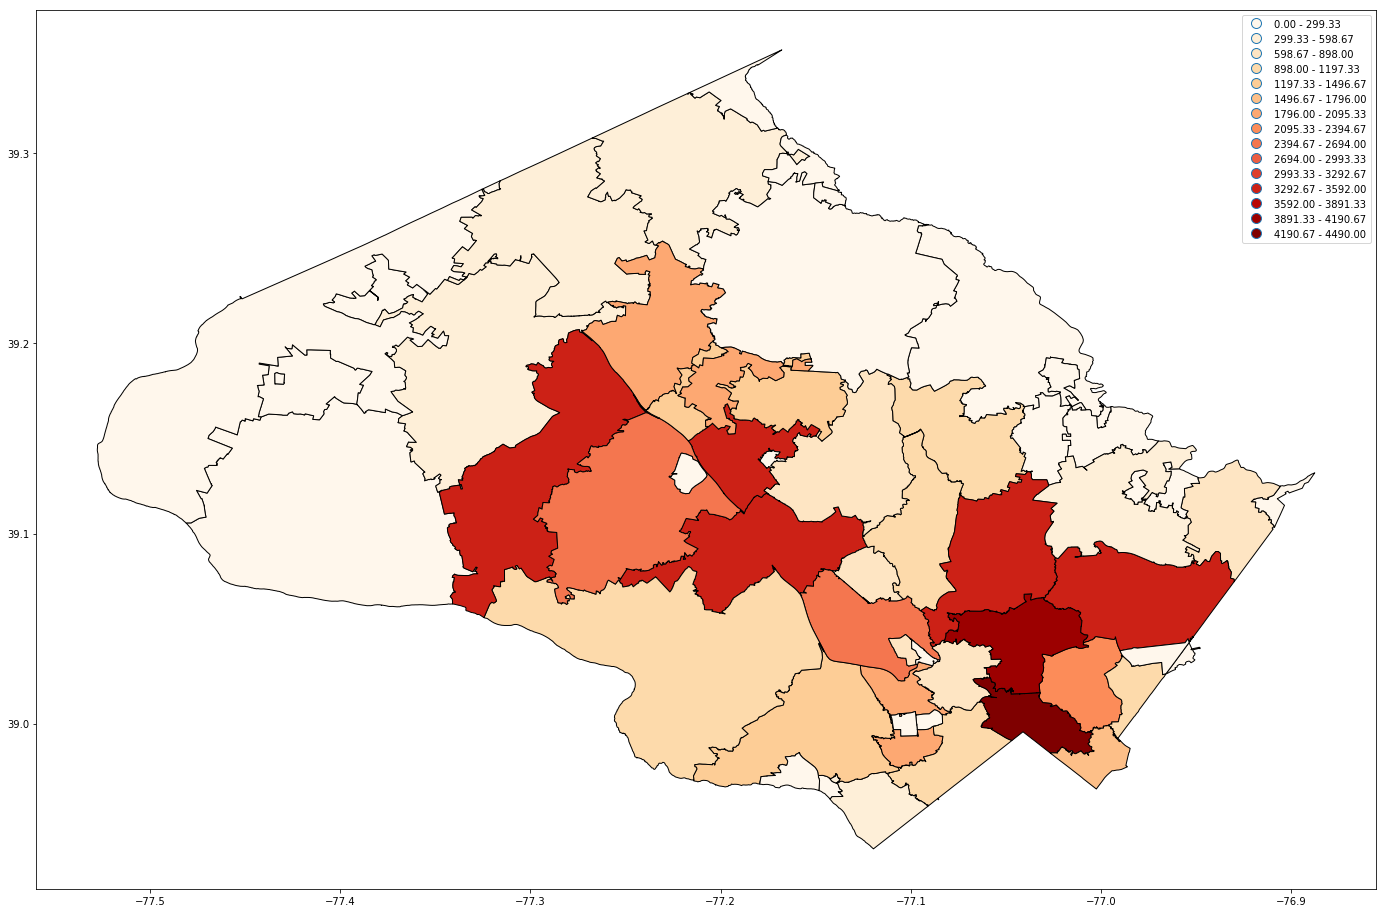

In [95]:
unique_zip = data['Zip Code'].nunique()
zipvalues = list(map(int, data['Zip Code'].value_counts().keys().tolist()))
zipcounts = list(map(int, data['Zip Code'].value_counts().tolist()))
ugh = []
zipcodes = zipcodes.sort_values('zipcode')
for z in zipcodes["zipcode"]:
    try:
        ugh.append(zipcounts[zipvalues.index(z)])
    except:
        ugh.append(0)
zipcodes['Crime Frequency'] = ugh
uzip = zipcodes.drop_duplicates("zipcode")
zipcodes.plot(figsize = (24,48),edgecolor = 'black')
ax = zipcodes.plot(column = 'Crime Frequency', cmap = "OrRd", scheme = 'equal_interval', k = 15, legend = True,figsize = (24,48),edgecolor = 'black')
fig = ax.get_figure()
fig.savefig("crime.png")

In [5]:
print(unique_zip)

60


# Chloropleth Annotated with Zipcode & Crime

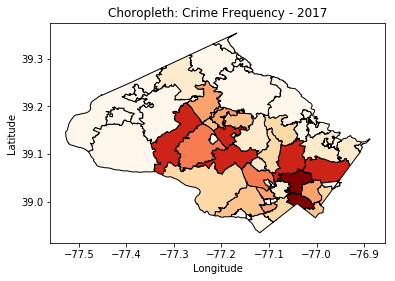

In [96]:
forzip = uzip
ay = zipcodes.plot(column = 'Crime Frequency', cmap = "OrRd", scheme = 'equal_interval', k = 10, legend = False, figsize = (6,12),edgecolor = 'black')
ay.set_title("Choropleth: Crime Frequency - 2017")
ay.set_xlabel("Longitude")
ay.set_ylabel("Latitude")
fig = ay.get_figure()
fig.savefig("!!Crime Frequency")

92    Annotation(-76.9532,39.0438,'20705.0')
43     Annotation(-76.907,39.1173,'20707.0')
57    Annotation(-76.9987,39.1616,'20777.0')
93    Annotation(-76.9565,39.0346,'20783.0')
0     Annotation(-77.1429,38.9666,'20812.0')
24    Annotation(-77.1052,39.0169,'20814.0')
21    Annotation(-77.0784,38.9838,'20815.0')
1     Annotation(-77.1181,38.9565,'20816.0')
27    Annotation(-77.1522,38.9962,'20817.0')
2     Annotation(-77.1611,38.9731,'20818.0')
62    Annotation(-77.0732,39.1511,'20832.0')
76    Annotation(-77.0569,39.2037,'20833.0')
58    Annotation(-77.4061,39.1117,'20837.0')
73    Annotation(-77.3798,39.2258,'20838.0')
70    Annotation(-77.4162,39.1785,'20839.0')
74    Annotation(-77.3265,39.1883,'20841.0')
63    Annotation(-77.4319,39.1814,'20842.0')
40    Annotation(-77.1811,39.0909,'20850.0')
38    Annotation(-77.1216,39.0781,'20851.0')
34    Annotation(-77.1415,39.0805,'20852.0')
52    Annotation(-77.0949,39.1022,'20853.0')
37    Annotation(-77.2235,39.0358,'20854.0')
64    Anno

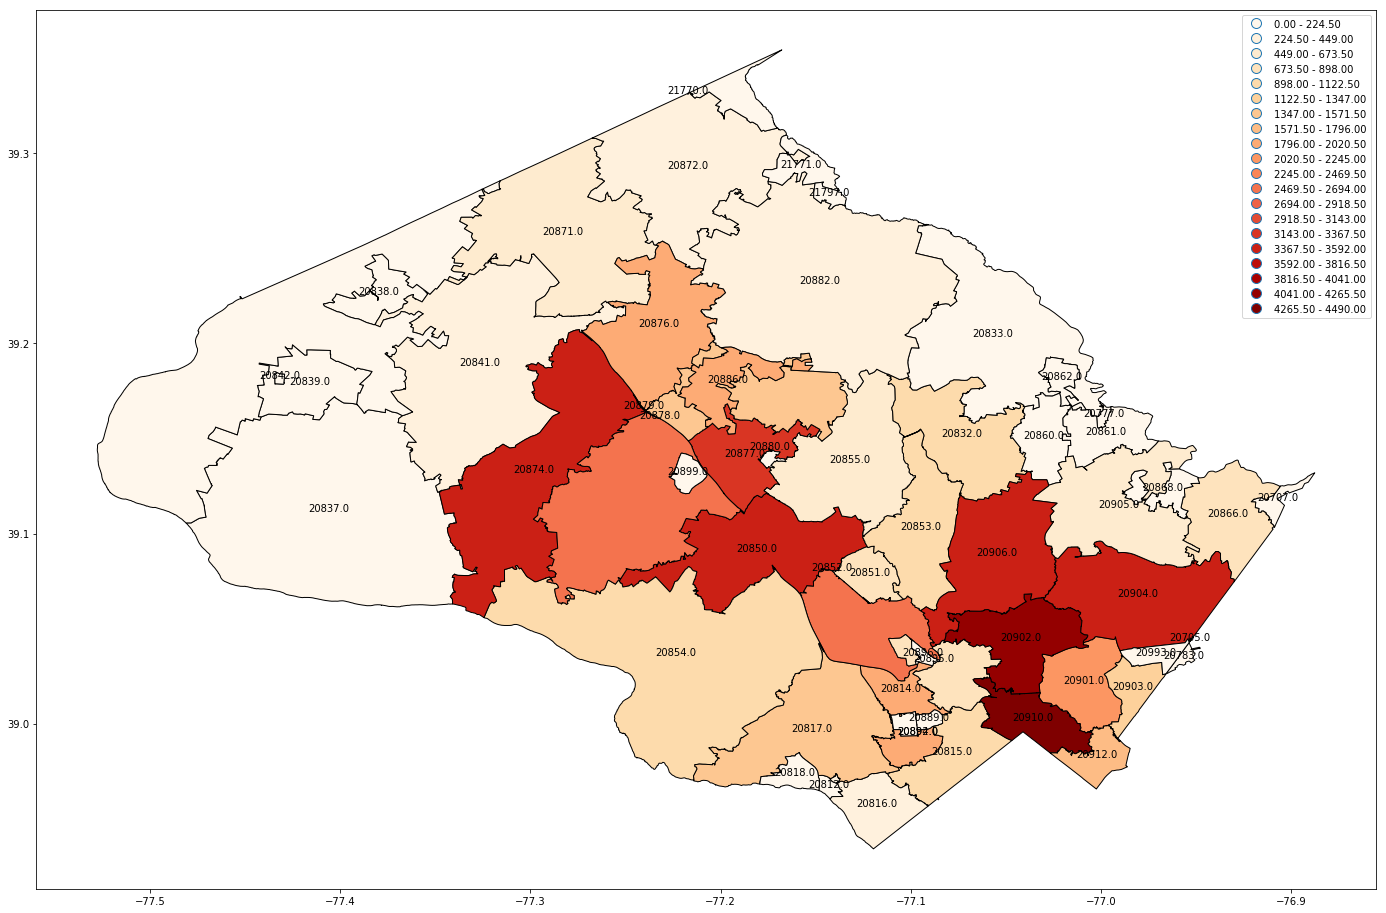

In [7]:
forzip = uzip
ay = zipcodes.plot(column = 'Crime Frequency', cmap = "OrRd", scheme = 'equal_interval', k = 20, legend = True,figsize = (24,48),edgecolor = 'black')
forzip.apply(lambda x: ay.annotate(s=x.zipcode, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

92       Annotation(-76.9532,39.0438,'1')
43        Annotation(-76.907,39.1173,'9')
57       Annotation(-76.9987,39.1616,'1')
93      Annotation(-76.9565,39.0346,'10')
0        Annotation(-77.1429,38.9666,'9')
24    Annotation(-77.1052,39.0169,'1984')
21     Annotation(-77.0784,38.9838,'979')
1      Annotation(-77.1181,38.9565,'345')
27    Annotation(-77.1522,38.9962,'1461')
2       Annotation(-77.1611,38.9731,'34')
62     Annotation(-77.0732,39.1511,'900')
76     Annotation(-77.0569,39.2037,'162')
58     Annotation(-77.4061,39.1117,'128')
73      Annotation(-77.3798,39.2258,'12')
70      Annotation(-77.4162,39.1785,'11')
74     Annotation(-77.3265,39.1883,'322')
63      Annotation(-77.4319,39.1814,'42')
40    Annotation(-77.1811,39.0909,'3402')
38     Annotation(-77.1216,39.0781,'799')
34    Annotation(-77.1415,39.0805,'2533')
52    Annotation(-77.0949,39.1022,'1032')
37    Annotation(-77.2235,39.0358,'1010')
64     Annotation(-77.1323,39.1377,'662')
61        Annotation(-77.0301,39.1

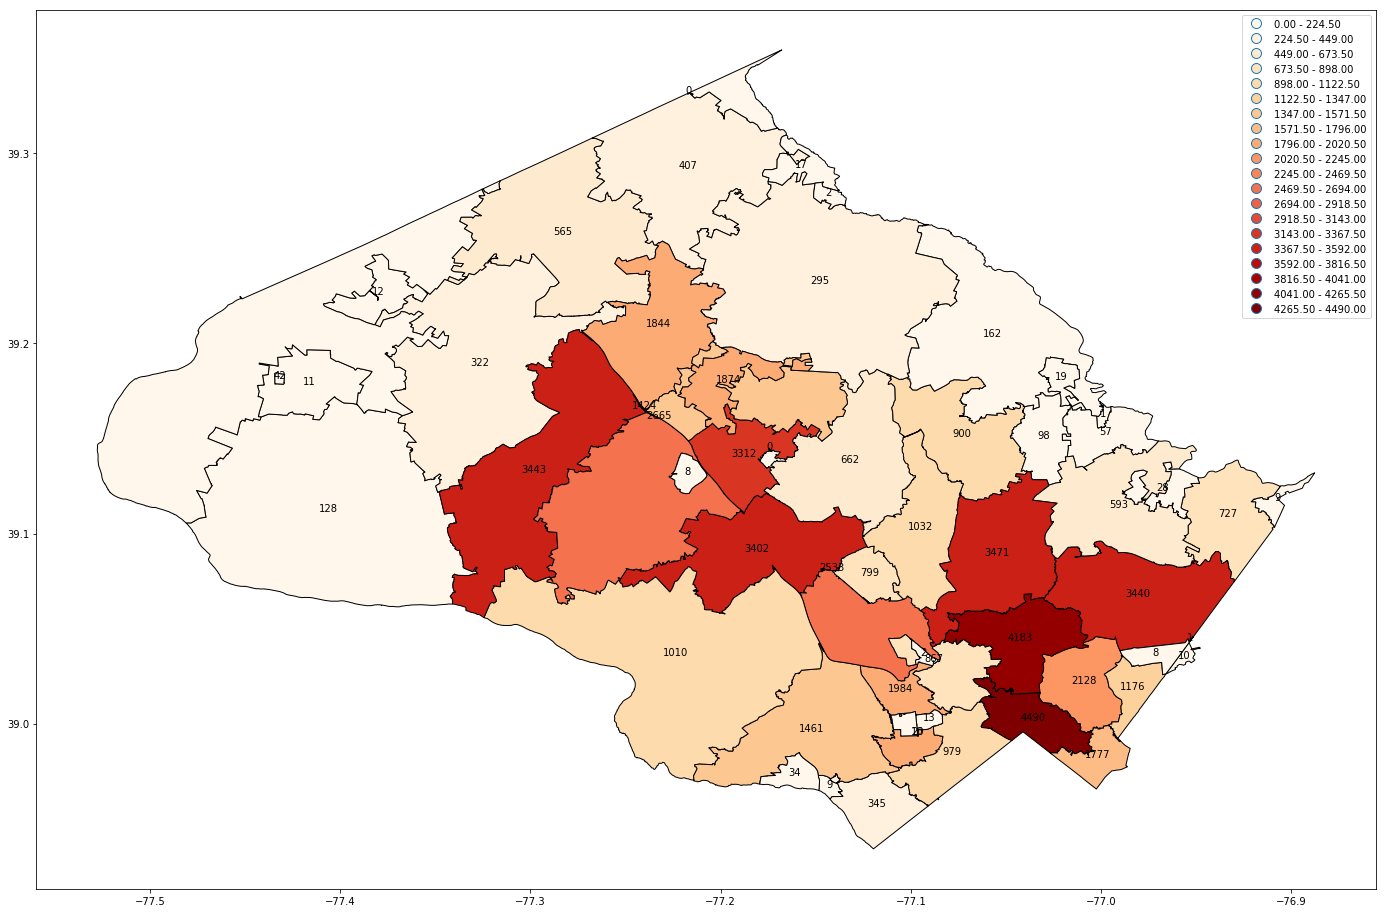

In [8]:
forcrime = uzip
ay = zipcodes.plot(column = 'Crime Frequency', cmap = "OrRd", scheme = 'equal_interval', k = 20, legend = True,figsize = (24,48),edgecolor = 'black')
forcrime.apply(lambda x: ay.annotate(s=x['Crime Frequency'], xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

# Zipcodes ranked by number of crimes

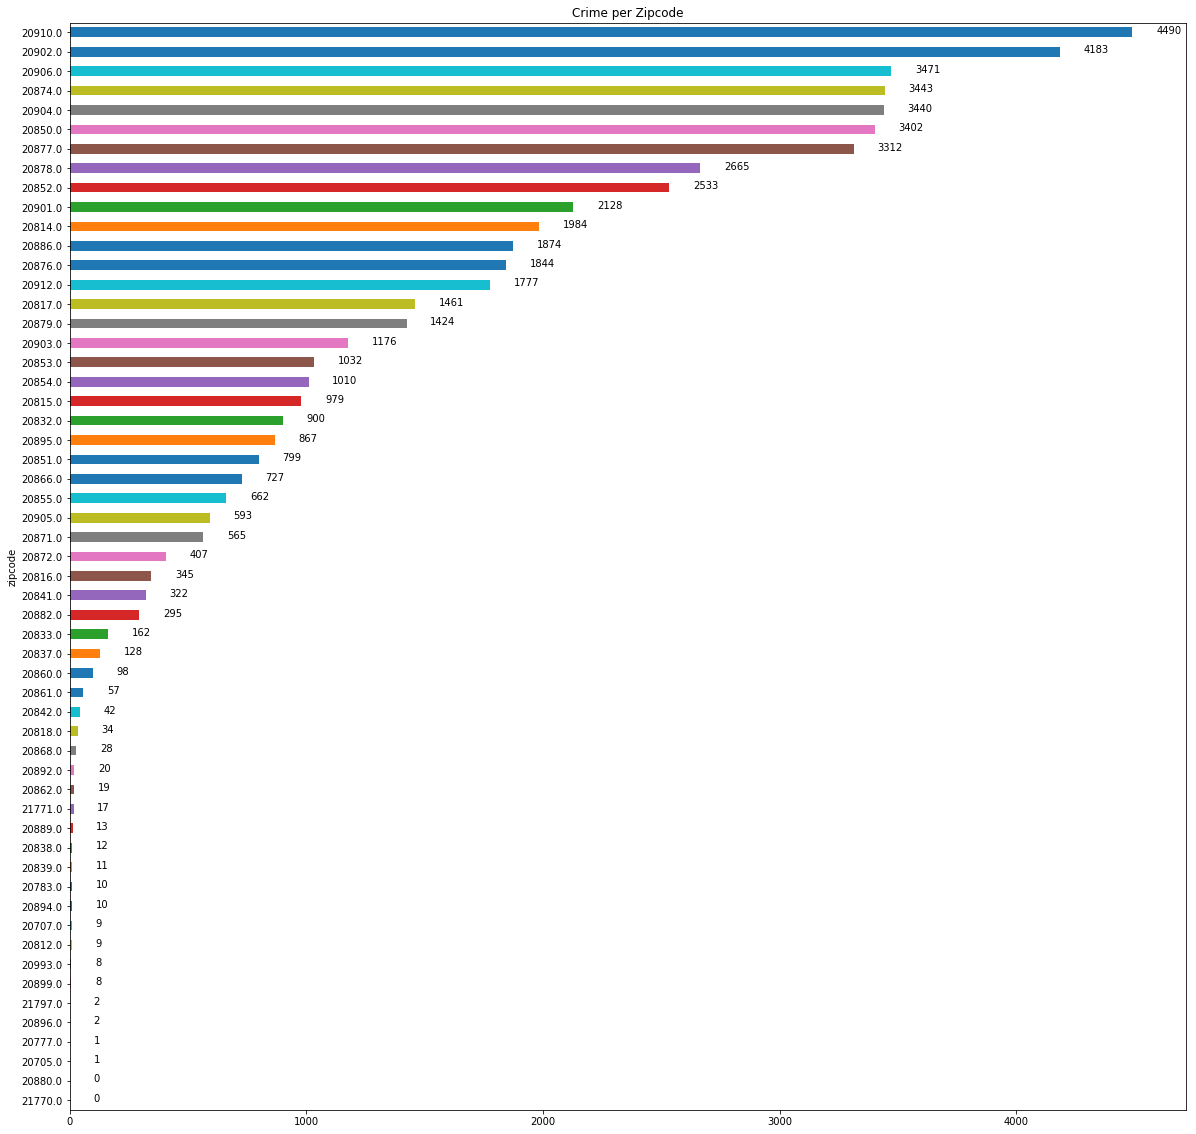

In [97]:
bar = (pd.DataFrame(uzip)).sort_values(['Crime Frequency'])
ax = bar.plot(x = 'zipcode', y = 'Crime Frequency', kind = 'barh', figsize = (20,20),title = 'Crime per Zipcode', legend = False)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+100, i.get_y()+.19,str(i.get_width()))


In [12]:
house = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/Crime_Edited.xlsx', sheet_name = 'House')
#house = pd.read_excel('C:\\Users\\vns8\\Documents\\Crime_Edited.xlsx', sheet_name = 'House')
house = house.set_index("zipcode")

In [98]:
df = bar.set_index("zipcode")
df["House Price"] = house["AVG"]

In [100]:
pop = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/Crime_Edited.xlsx', sheet_name = '2010 - pop')
#pop = pd.read_excel('C:\\Users\\vns8\\Documents\\Crime_Edited.xlsx', sheet_name = '2010 - pop')

In [101]:
pop = pop.set_index("zipcode")
df["Population"] = pop['pop']

In [102]:
ratio = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/Crime_Edited.xlsx', sheet_name = 'Ratio')
#ratio = pd.read_excel('C:\\Users\\vns8\\Documents\\Crime_Edited.xlsx', sheet_name = 'Ratio')

In [103]:
ratio = ratio.set_index("zip")
df['Gray_ratio'] = ratio['ratio']

In [21]:
print(len(zipcodes.index))

97


In [104]:
zipcodes = zipcodes.sort_values("zipcode")
temp = list(df.index)
temp.sort()
print(len(temp))
ugh = [0 for i in range (0,len(temp))]
for index,row in zipcodes.iterrows():
    for i in range(0,len(temp)):
        if temp[i] == row["zipcode"]:
            ugh[i] += row["shape_area"]
print(ugh)
df = df.sort_values("zipcode")
df["shape_area"] = ugh

56
[335106.36711640004, 21689687.5321, 5649432.065, 7965229.39609, 9811019.223207954, 116913504.4848343, 151814754.53358793, 117565480.431, 403664948.588, 35996828.3577, 276725061.584, 558534287.761, 1193865423.98, 81211130.52876624, 147536646.505, 772351833.344, 1137808278.57244, 385670140.779, 68797879.2614, 228151525.4414132, 251565963.373, 1043434019.25, 382152351.631, 100388052.557, 103600923.231, 31407660.196, 201917467.932, 47765164.9374, 579427125.963, 548226849.644, 650676425.2403849, 325819647.952, 168215500.05875927, 566700114.2506483, 233529479.879872, 6368112.649494099, 1009821989.17, 110061771.774, 10781552.967, 13848920.282316558, 27588.68210986, 120527858.666338, 7715219.99143, 25016992.5795, 155364678.639, 213127715.894, 65972447.4483, 378079609.413, 356085971.377, 359110751.771, 126320091.137, 65209197.2692, 31161143.5697, 12006.6579819, 115674916.88535081, 13510501.4518]


In [105]:
ugh = []
ughh = []
for index,row in df.iterrows():
    ugh.append(float(row['Crime Frequency'])/float(row['Population']))
    ughh.append(float(row['Population'])/float(row['shape_area']))
df["crime/pop"] = ugh
df["density"] = ughh

In [106]:
h = df.loc[df["House Price"] >= 0]
p = df.loc[df["Population"] >= 0]
cp = h.loc[h["crime/pop"] >= 0]
d = df.loc[df["density"] >= 0]
r = df.loc[df["Gray_ratio"] >= 0]

In [107]:
print(d.sort_values("density"))
d['density'],d['Crime Frequency']

                  mail_city    shape_area     shape_leng  \
zipcode                                                    
20839.0         BEALLSVILLE  1.475366e+08   76366.519320   
20842.0           DICKERSON  1.137808e+09  357054.654503   
20838.0         BARNESVILLE  8.121113e+07   65358.201384   
20837.0         POOLESVILLE  1.193865e+09  179480.321022   
20899.0        GAITHERSBURG  2.501699e+07   22469.858743   
20862.0            BRINKLOW  3.140766e+07   44132.786119   
20841.0               BOYDS  7.723518e+08  250533.236842   
20833.0         BROOKEVILLE  5.585343e+08  207931.092330   
20882.0        GAITHERSBURG  1.009822e+09  223831.799733   
20868.0        SPENCERVILLE  4.776516e+07   71900.486277   
20861.0              ASHTON  1.036009e+08   68929.848578   
20871.0          CLARKSBURG  5.794271e+08  195709.493007   
20860.0        SANDY SPRING  1.003881e+08   63933.614119   
20872.0            DAMASCUS  5.482268e+08  179417.342235   
20812.0           GLEN ECHO  9.811019e+0

(zipcode
 20705.0    0.078148
 20707.0    0.001454
 20777.0    0.000587
 20812.0    0.000026
 20814.0    0.000236
 20815.0    0.000192
 20816.0    0.000138
 20817.0    0.000090
 20818.0    0.000055
 20832.0    0.000090
 20833.0    0.000014
 20837.0    0.000005
 20838.0    0.000003
 20839.0    0.000001
 20841.0    0.000014
 20842.0    0.000002
 20850.0    0.000120
 20851.0    0.000206
 20852.0    0.000177
 20853.0    0.000118
 20854.0    0.000048
 20855.0    0.000037
 20860.0    0.000024
 20861.0    0.000018
 20862.0    0.000011
 20866.0    0.000066
 20868.0    0.000017
 20871.0    0.000023
 20872.0    0.000024
 20874.0    0.000088
 20876.0    0.000078
 20877.0    0.000204
 20878.0    0.000110
 20879.0    0.000104
 20880.0    0.000071
 20882.0    0.000014
 20886.0    0.000302
 20895.0    0.000158
 20896.0    0.000117
 20899.0    0.000006
 20901.0    0.000224
 20902.0    0.000229
 20903.0    0.000358
 20904.0    0.000144
 20905.0    0.000051
 20906.0    0.000180
 20910.0    0.000296
 209

y = -2928.946529268088x + 1103.1670981053398
r =  -0.13929806584581747


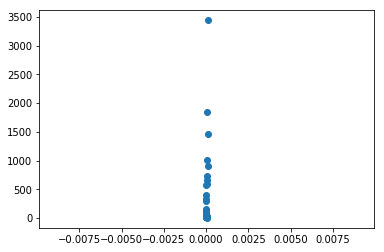

In [108]:
d2 = d.loc[df["density"] < .0001]
from scipy import stats
# get coeffs of linear fit
m, b, r_value, p_value, std_err = stats.linregress(d['density'],d['Crime Frequency'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
import seaborn as sns
#sns.lmplot(x="density", y="Number of Crimes", data=d)
#bar.plot(x = "Number of Crimes", y =['house','reg'],kind = 'scatter')
#sns.regplot(x="House Price", y="Number of Crimes", data=h, order = np.sqrt(3))
plt.scatter(d2['density'],d2['Crime Frequency'])
plt.show()

y = -0.001123282393845748x + 1783.0240899362834
r =  -0.15173644795724817


/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


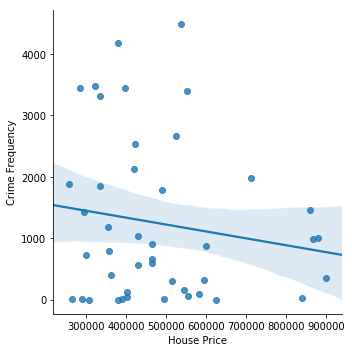

In [109]:
from scipy import stats
# get coeffs of linear fit
m, b, r_value, p_value, std_err = stats.linregress(h['House Price'],h['Crime Frequency'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
import seaborn as sns
ax = sns.lmplot(x="House Price", y="Crime Frequency", data=h)
ax.savefig("!!house vs Crime.png")
#bar.plot(x = "Number of Crimes", y =['house','reg'],kind = 'scatter')
#sns.regplot(x="House Price", y="Number of Crimes", data=h, order = np.sqrt(3))

y = 0.05867432182141776x + -175.29830531304515
r =  0.833722230541378


/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


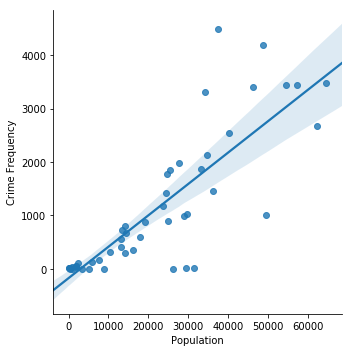

In [113]:
m, b, r_value, p_value, std_err = stats.linregress(p['Population'],p['Crime Frequency'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="Population", y="Crime Frequency", data=p)
ax.savefig("!!Population vs Crime.png")

y = -2.7139283169592285e-08x + 0.055106451707866023
r =  -0.174046484177332


/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


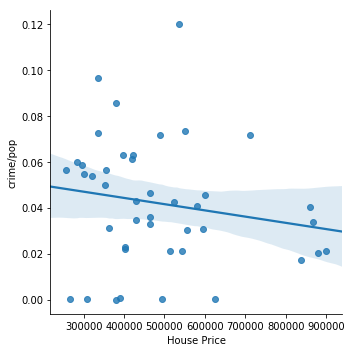

In [112]:
m, b, r_value, p_value, std_err = stats.linregress(cp['House Price'],cp['crime/pop'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="House Price", y="crime/pop", data=cp)
ax.savefig("!!!!!!")

y = 0.0015595002015640212x + 0.09650235810033592
r =  0.21572886080509845


/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


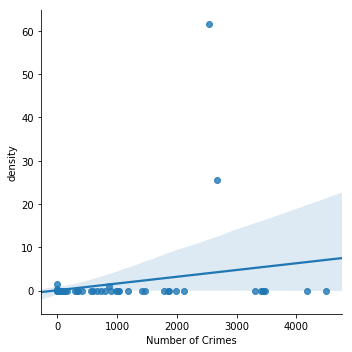

In [21]:
m, b, r_value, p_value, std_err = stats.linregress(d['Crime Frequency'],d['density'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
sns.lmplot(x="Crime Frequencys", y="density", data=d)

In [22]:
print(df)

                  mail_city    shape_area     shape_leng  \
zipcode                                                    
21770.0            MONROVIA  1.200666e+04     458.325717   
20880.0    WASHINGTON GROVE  5.128570e+04    1172.868704   
20705.0          BELTSVILLE  1.661674e+04     567.139544   
20777.0            HIGHLAND  5.649432e+06   15733.912221   
20896.0        GARRETT PARK  7.715220e+06   18896.062914   
21797.0            WOODBINE  1.351050e+07   19875.801746   
20899.0        GAITHERSBURG  2.501699e+07   22469.858743   
20993.0       SILVER SPRING  3.116114e+07   29796.941771   
20812.0           GLEN ECHO  9.810937e+06   14504.506513   
20707.0              LAUREL  2.168969e+07   35463.305152   
20894.0            BETHESDA  2.547457e+04    1298.401522   
20783.0             ADELPHI  7.965229e+06   17070.357631   
20839.0         BEALLSVILLE  1.475366e+08   76366.519320   
20838.0         BARNESVILLE  8.121108e+07   65358.201384   
20889.0            BETHESDA  1.078155e+0

In [23]:
d1 = d.loc[d["density"] < 10]

y = -2.8189216598377344e-05x + 0.09324083948726541
r =  -0.1289169038709458


/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


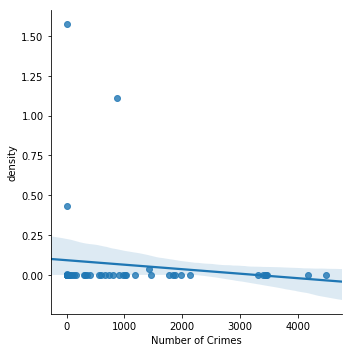

In [24]:
m, b, r_value, p_value, std_err = stats.linregress(d1['Crime Frequency'],d1['density'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
sns.lmplot(x="Crime Frequency", y="density", data=d1)

y = -5.706411555778856e-07x + 0.6858966595808782
r =  -0.000565559238629263


/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


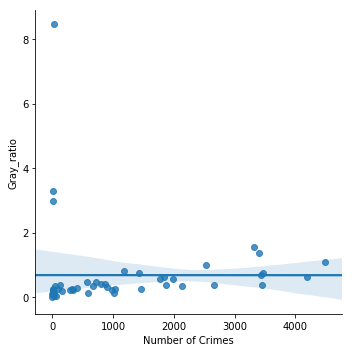

In [25]:
m, b, r_value, p_value, std_err = stats.linregress(r['Crime Frequency'],r['Gray_ratio'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="Crime Frequency", y="Gray_ratio", data=r)
ax.savefig("Gray Ratio vs Crime.png")

y = 2923.5369722770274x + -8.364907224331546
r =  0.7561684539736295


/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


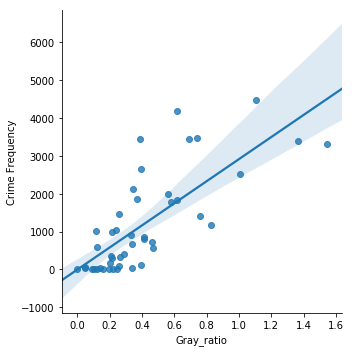

In [114]:
r1 = r.loc[r["Gray_ratio"] < 2]
m, b, r_value, p_value, std_err = stats.linregress(r1['Gray_ratio'],r1['Crime Frequency'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(y="Crime Frequency", x="Gray_ratio", data=r1)
ax.savefig("!!gray vs crime.png")
#

In [27]:
print(r1)

                  mail_city    shape_area     shape_leng  \
zipcode                                                    
20777.0            HIGHLAND  5.649432e+06   15733.912221   
21797.0            WOODBINE  1.351050e+07   19875.801746   
20812.0           GLEN ECHO  9.810937e+06   14504.506513   
20707.0              LAUREL  2.168969e+07   35463.305152   
20839.0         BEALLSVILLE  1.475366e+08   76366.519320   
20838.0         BARNESVILLE  8.121108e+07   65358.201384   
21771.0            MT. AIRY  5.268646e+07   60406.248698   
20862.0            BRINKLOW  3.140766e+07   44132.786119   
20868.0        SPENCERVILLE  4.776516e+07   71900.486277   
20818.0          CABIN JOHN  3.599683e+07   31103.235156   
20842.0           DICKERSON  2.759828e+06    6866.008006   
20861.0              ASHTON  1.036009e+08   68929.848578   
20860.0        SANDY SPRING  1.003881e+08   63933.614119   
20837.0         POOLESVILLE  1.193865e+09  179480.321022   
20833.0         BROOKEVILLE  5.585343e+0

In [28]:
#s = "40	38	31	33	29	36	38	39	127	28	44	50	46	30	42	54	61	80	73	110	128	160	155	154	46	47	41	35	42	46	49	86	74	56	133	180	141	158	189	220	173	160	159	66	38	44	48	39	31	47	42	52	82	90	88	80	73	73	135	139	135	127	157	198	145	154	184	220	179	184	204	162	91	43	39	47	41	34	48	55	71	98	78	83	88	64	59	85	72	78	117	170	199	171	116	107	130	130	132	156	213	208	205	197	156	122	103	106	64	49	49	49	66	83	95	71	70	78	81	66	100	92	93	95	94	93	92	86	122	154	153	153	128	92	92	123	147	147	128	121	117	97	142	179	179	75	36	36	36	64	84	87	125	113	89	102	75	58	58	58	65	92	92	94	94	94	94	93	85	121	153	153	153	139	115	96	109	129	147	128	133	144	123	138	147	135	63	36	36	36	64	99	136	209	186	127	106	102	102	102	102	106	91	82	90	133	135	118	93	85	90	118	180	162	149	142	140	154	161	147	146	158	171	150	134	114	90	81	78	72	41	91	145	182	223	189	137	147	120	119	148	149	148	131	115	102	93	108	121	106	76	81	97	130	186	164	150	149	164	171	172	168	171	166	155	151	147	150	163	135	89	50	71	110	150	185	161	144	130	114	106	120	155	184	172	134	75	122	104	87	85	81	77	74	120	159	158	132	115	111	138	145	153	177	135	154	197	150	141	165	227	190	147	106	88	132	161	151	122	112	114	124	125	137	158	151	143	118	55	122	102	82	76	77	81	71	131	176	164	124	110	117	129	132	145	178	138	165	220	176	134	118	140	127	128	134	122	139	148	139	113	104	109	130	122	111	105	112	113	106	86	84	96	82	89	88	85	102	137	161	161	109	126	177	160	157	156	153	142	154	181	204	143	90	84	107	125	132	110	113	119	118	92	92	109	130	116	97	80	100	113	117	104	90	90	97	95	89	88	121	136	143	143	102	135	197	164	169	165	132	136	137	146	196	142	90	84	122	137	129	91	96	104	103	77	85	107	118	120	116	108	118	118	113	112	86	80	87	93	108	126	144	118	130	155	124	142	156	146	147	147	148	155	126	100	92	120	130	126	105	102	103	102	94	100	112	114	123	126	121	95	76	77	85	73	71	93	147	127	120	117	100	116	138	156	150	153	155	124	118	115	109	118	119	116	121	105	95	101	119	120	114	123	120	95	91	77	61	64	64	82	126	130	113	88	88	113	129	123	119	128	135	112	107	109	117	120	113	103	114	99	92	106	125	118	104	122	74	64	59	40	36	36	37	61	70	68	65	101	116	91	105	93	70	80	74	76	97	109	105	94	100	105	112	119	119	114	111	114	95	92	74	71	72	72	72	97	124	100	96	86	63	73	58	47	104	69	49	78	76	67	63	91	115	125	117	120	131	102	89	91	99	100	100	100	101	99	97	96	106	107	96	94	76	58	72	74	72	68	50	43	46	66	68	78	102	125	147	61	96	102	102	102	102	99	92	72	78	88	95	68	49	43	69	74	80	95	94	82	72	92	79	78	102	125	97	85	97	105	106	93	92	94	96	78	62	58	86	81	81	96	96	94	97	117	106	99	102	147	89	93	102	107	101	93	85	87	80	73	90	73	70	96	96	96	101	120	126	111	75	91	103	108	106	95	105	100	92	97	85	86	107	108	108	109	114	127	109	105	106	101	111	108	98	91	81	87	113	113	113	113	113	126	104	110	108	107	105	94	84	89	113	113	121	133	99	100	108	107	97	98	112	101	113	104	119	108	98	91	106	161	133	119	112	112	89	94	116	126	128	125	136	181	165	163	163	163	148	162	182	138	128	135	155	156	140	109	114	162	205	214	205	184	199	214	218	168	156	171	212	214	175	113	94	147	175	209	216	208	187	206	215	212	193	200	219	244	225	178	115	92	193	205	202	201	198	191	197	200	198	185	215	246	250	189	134	90	63	199	193	205	208	199	176	182	197	208	166	179	202	206	150	96	55	55	228	196	187	185	178	160	164	188	216	168	132	109	104	125	113	70	58	234	213	177	168	178	208	198	176	149	149	134	110	82	143	156	111	67	212	216	189	182	181	177	162	144	127	122	137	163	193	164	128	92	111	135	209	230	218	179	141	149	190	136	120	136	188	162	127	95	119	163	175	179	206	207	133	169	193	191	137	120	126	146	116	97	43	120	166	169	103	88	98	122	149	139	96	89	119	143	107	71	80	80	158	181	140	59	35	57	130	110	88	78	78	108	127	77	133	123	92	111	115	95	43	27	59	170	116	63	37	67	85	90	77	166	169	128	58	51	50	46	32	45	91	187	170	108	20	34	39	45	146	124	39	30	29	27	27	54	100	159	184	137	20	44	52	53	95	90	37	39	38	29	29	66	118	157	174	131	32	68	80	76	63	44	66	70	51	51	90	138	158	155	120	59	64	74	79	60	91	100	80	80	105	129	116	113	102	82	62	69	53	76	82	67	67	85	97	70	70	76	83	83	78	33	33	37	33	29	32	41	59	85	85"
#string = s.split("	")
#bright = dark = 0
#for x in string:
#    if int(x) >= 100:
#        bright += int(x)
#    else:
#        dark += int(x)
#print (bright)
#print (dark)
#print (bright/dark)

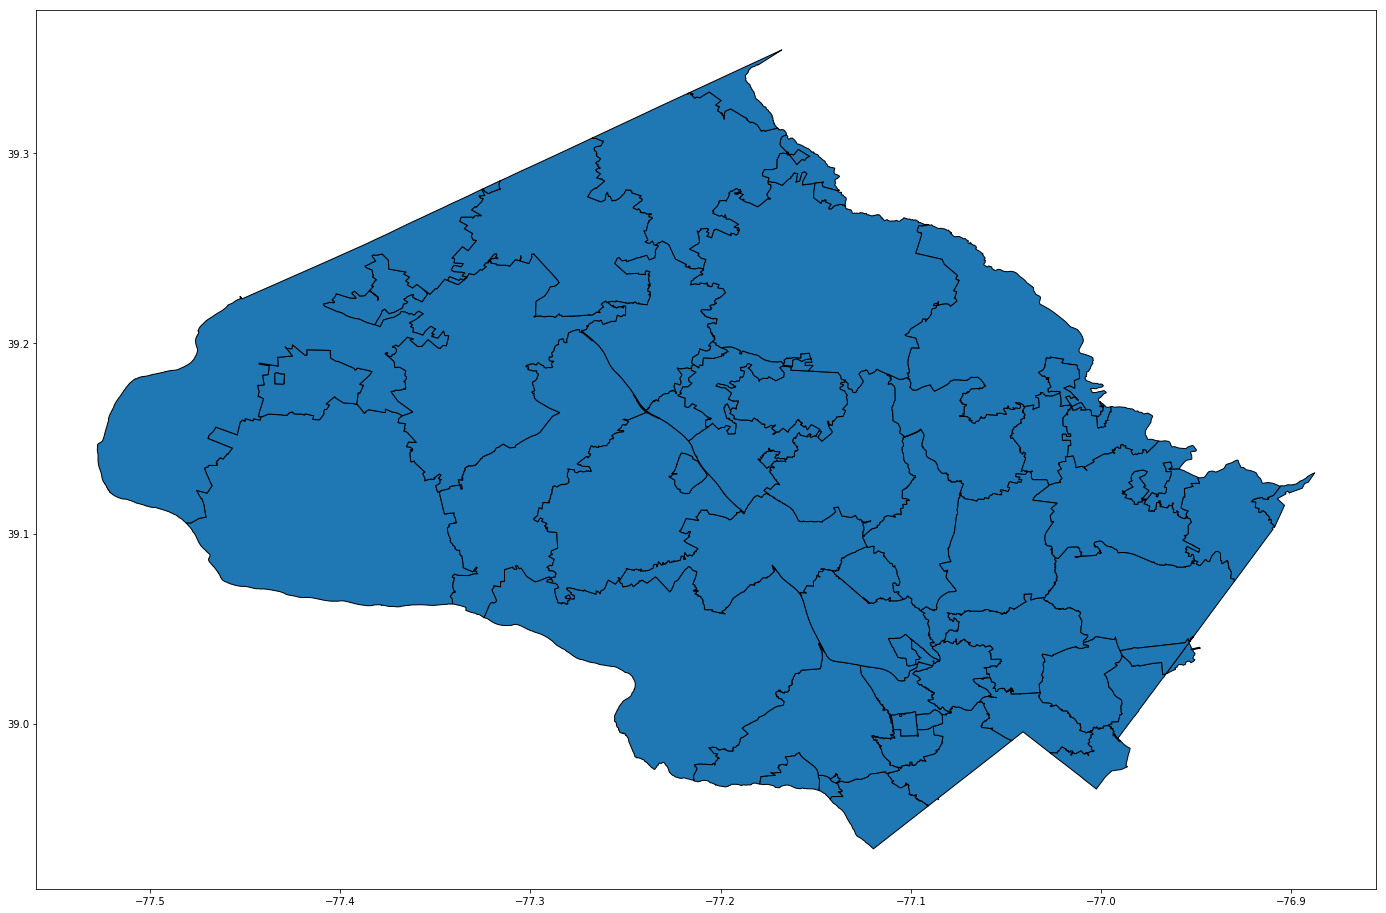

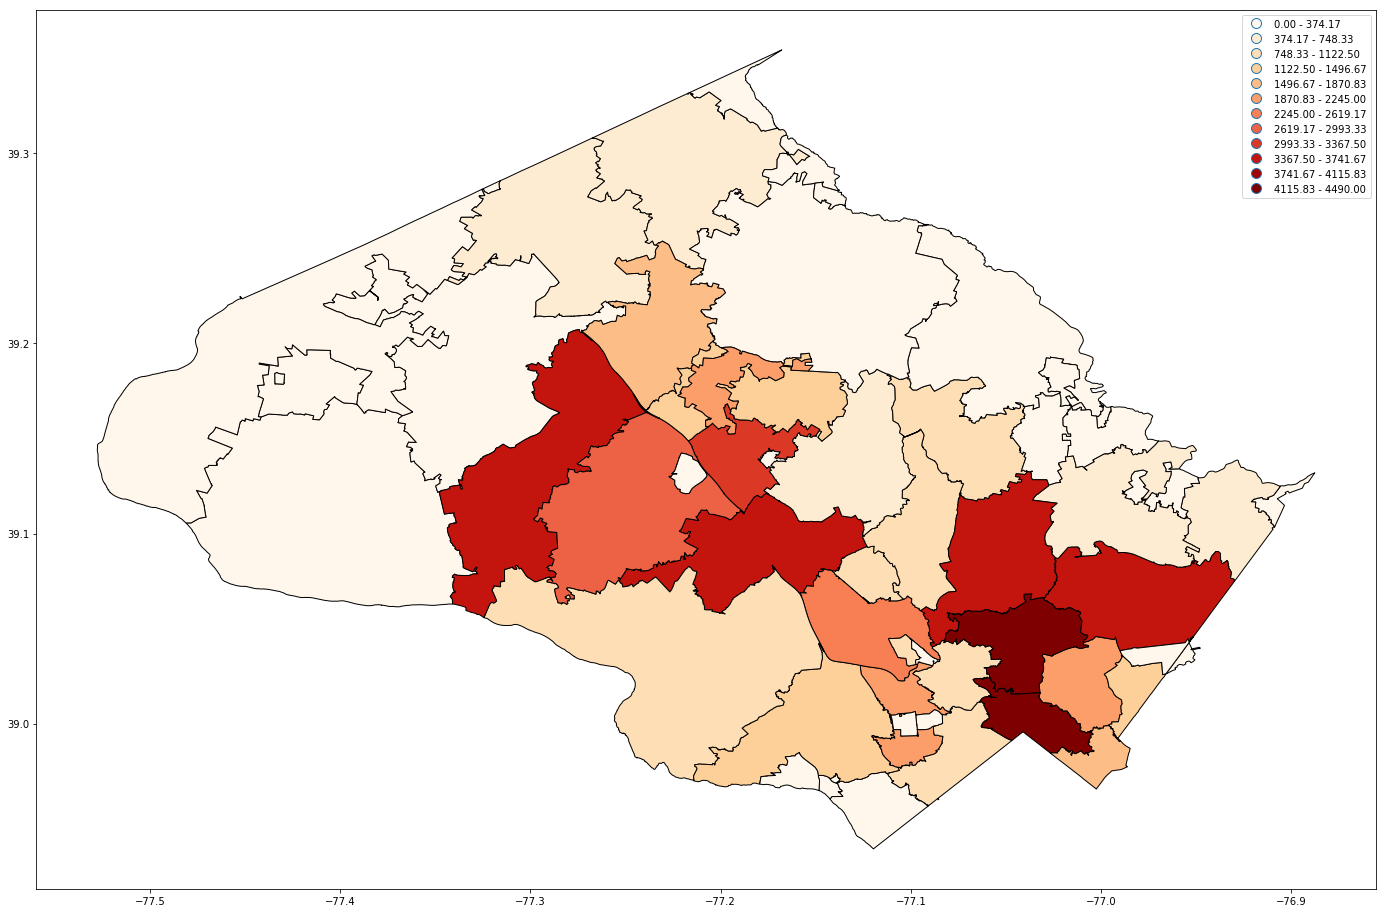

In [29]:
unique_zip = data['Zip Code'].nunique()
zipvalues = list(map(int, data['Zip Code'].value_counts().keys().tolist()))
zipcounts = list(map(int, data['Zip Code'].value_counts().tolist()))
ugh = []
zipcodes = zipcodes.sort_values('zipcode')
for z in zipcodes["zipcode"]:
    try:
        ugh.append(zipcounts[zipvalues.index(z)])
    except:
        ugh.append(0)
zipcodes['Crime Frequency'] = ugh
uzip = zipcodes.drop_duplicates("zipcode")
zipcodes.plot(figsize = (24,48),edgecolor = 'black')
zipcodes.plot(column = 'Crime Frequency', cmap = "OrRd", scheme = 'equal_interval', k = 12, legend = True,figsize = (24,48),edgecolor = 'black')

In [30]:
ugh = [0 for x in range (0,len(uzip.index))]
i = 0
for index,row in uzip.iterrows():
    for index1,row1 in r1.iterrows():
       # print(index1, row["zipcode"])
        if index1 == index:
            ugh[i] = round(row1["Gray_ratio"],2)
            break
        else:
            ugh[i] = (0)
    i += 1
print (ugh)
uzip["Gray_ratio"] = ugh

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [31]:
print(uzip)

             mail_city    shape_area  zipcode     shape_leng  \
92          BELTSVILLE  1.661674e+04  20705.0     567.139544   
43              LAUREL  2.168969e+07  20707.0   35463.305152   
57            HIGHLAND  5.649432e+06  20777.0   15733.912221   
93             ADELPHI  7.965229e+06  20783.0   17070.357631   
0            GLEN ECHO  9.810937e+06  20812.0   14504.506513   
8             BETHESDA  3.187062e+00  20814.0       7.162744   
87         CHEVY CHASE  8.374774e+02  20815.0     118.304485   
1             BETHESDA  1.175655e+08  20816.0   58716.124845   
27            BETHESDA  4.036649e+08  20817.0  143234.920079   
2           CABIN JOHN  3.599683e+07  20818.0   31103.235156   
62               OLNEY  2.767251e+08  20832.0  128344.128712   
76         BROOKEVILLE  5.585343e+08  20833.0  207931.092330   
58         POOLESVILLE  1.193865e+09  20837.0  179480.321022   
73         BARNESVILLE  8.121108e+07  20838.0   65358.201384   
70         BEALLSVILLE  1.475366e+08  20

In [74]:
print(r1)

                  mail_city    shape_area     shape_leng  \
zipcode                                                    
20707.0              LAUREL  2.168969e+07   35463.305152   
20777.0            HIGHLAND  5.649432e+06   15733.912221   
20812.0           GLEN ECHO  9.811019e+06   14504.506513   
20814.0            BETHESDA  1.169135e+08   58373.863054   
20815.0         CHEVY CHASE  1.518148e+08   78258.270285   
20816.0            BETHESDA  1.175655e+08   58716.124845   
20817.0            BETHESDA  4.036649e+08  143234.920079   
20818.0          CABIN JOHN  3.599683e+07   31103.235156   
20832.0               OLNEY  2.767251e+08  128344.128712   
20833.0         BROOKEVILLE  5.585343e+08  207931.092330   
20837.0         POOLESVILLE  1.193865e+09  179480.321022   
20838.0         BARNESVILLE  8.121113e+07   65358.201384   
20839.0         BEALLSVILLE  1.475366e+08   76366.519320   
20841.0               BOYDS  7.723518e+08  250533.236842   
20842.0           DICKERSON  1.137808e+0

In [71]:
uzip = uzip.set_index("zipcode")

In [75]:
ugh = [0 for x in range (0,len(zipcodes.index))]
i = 0
for index,row in zipcodes.iterrows():
    for index1,row1 in r1.iterrows():
       # print(index1, row["zipcode"])
        if index1 == row["zipcode"]:
            ugh[i] = round(row1["Gray_ratio"],2)
            break
        else:
            ugh[i] = (0)
    i += 1
print (ugh)

[0, 0.09, 0.0, 0, 0.12, 0.56, 0.21, 0.21, 0.26, 0.05, 0.33, 0.2, 0.39, 0.25, 0.22, 0.26, 0.34, 1.37, 0.41, 1.01, 0.24, 0.12, 0.34, 0.26, 0.05, 0.16, 0.46, 0.14, 0.47, 0.29, 0.39, 0.61, 1.54, 0.39, 0.76, 0, 0.22, 0.37, 0, 0, 0, 0.41, 0, 0, 0.35, 0.61, 0.83, 0.69, 0.12, 0.74, 1.1, 0.58, 0, 0, 0.2, 0.1]


In [63]:
zipcodes["Gray_ratio"] = ugh

92    Annotation(-76.9532,39.0438,'0')
43     Annotation(-76.907,39.1173,'0')
57    Annotation(-76.9987,39.1616,'0')
93    Annotation(-76.9565,39.0346,'0')
0     Annotation(-77.1429,38.9666,'0')
8     Annotation(-77.0966,38.9969,'0')
87     Annotation(-77.095,38.9809,'0')
1     Annotation(-77.1181,38.9565,'0')
27    Annotation(-77.1522,38.9962,'0')
2     Annotation(-77.1611,38.9731,'0')
62    Annotation(-77.0732,39.1511,'0')
76    Annotation(-77.0569,39.2037,'0')
58    Annotation(-77.4061,39.1117,'0')
73    Annotation(-77.3798,39.2258,'0')
70    Annotation(-77.4162,39.1785,'0')
74    Annotation(-77.3265,39.1883,'0')
78      Annotation(-77.32,39.2817,'0')
40    Annotation(-77.1811,39.0909,'0')
38    Annotation(-77.1216,39.0781,'0')
34    Annotation(-77.1415,39.0805,'0')
52    Annotation(-77.0949,39.1022,'0')
37    Annotation(-77.2235,39.0358,'0')
64    Annotation(-77.1323,39.1377,'0')
61      Annotation(-77.0301,39.15,'0')
55    Annotation(-76.9974,39.1524,'0')
67    Annotation(-77.0207

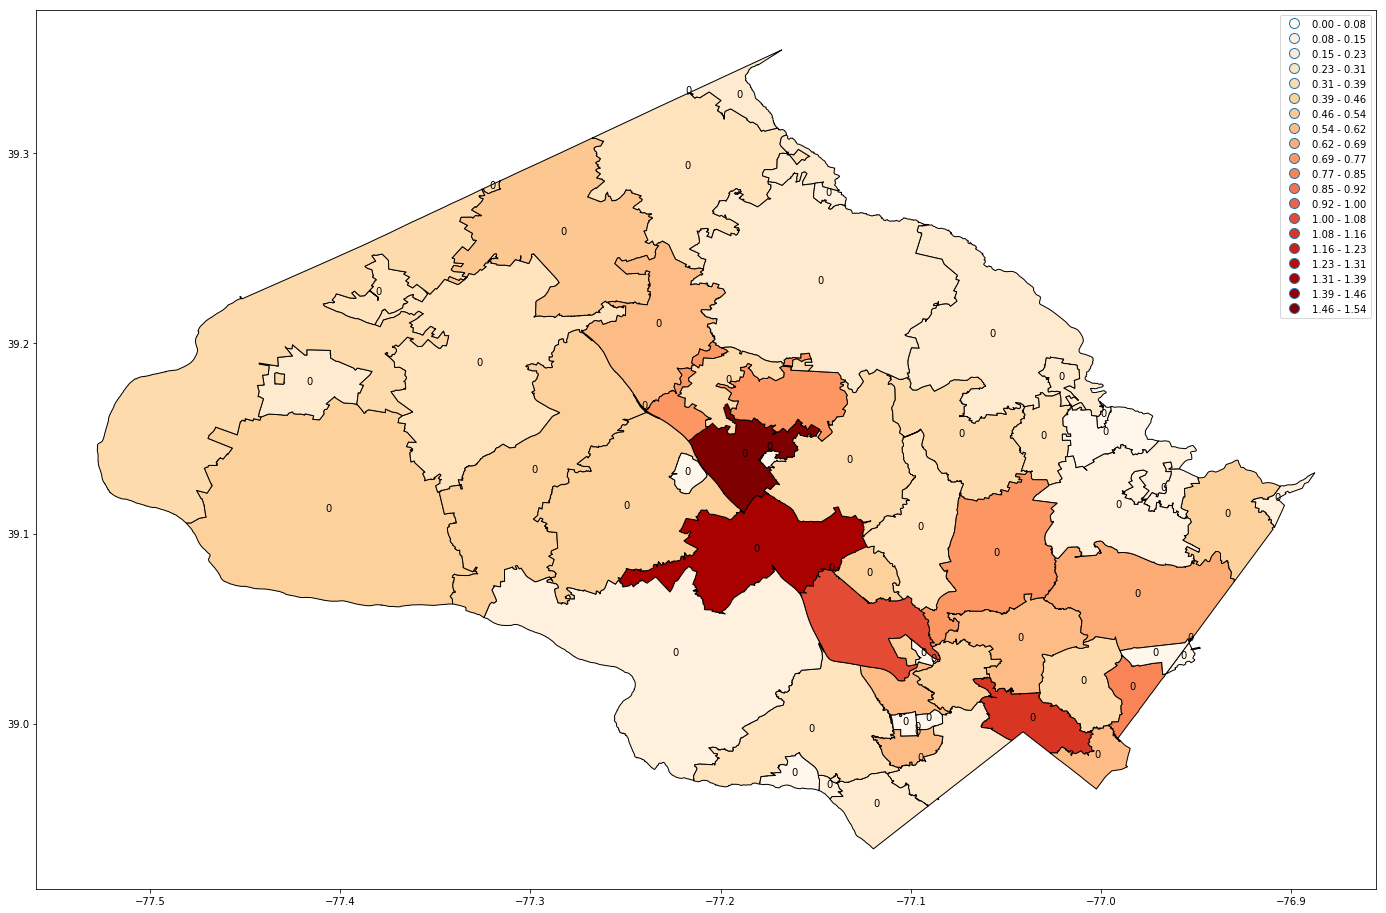

In [35]:
ay = zipcodes.plot(column = 'Gray_ratio', cmap = "OrRd", scheme = 'equal_interval', k = 20, legend = True,figsize = (24,48),edgecolor = 'black')
uzip.apply(lambda x: ay.annotate(s=x.Gray_ratio, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

In [1]:
ay = zipcodes.plot(column = 'Gray_ratio', cmap = "binary", scheme = 'equal_interval', k = 10, legend = False,figsize = (6,12),edgecolor = 'black')
ay.set_title("Choropleth: Gray Ratio - 2017")
ay.set_xlabel("Longitude")
ay.set_ylabel("Latitude")
fig = ay.get_figure()
fig.savefig("!!gray ratio")

NameError: name 'zipcodes' is not defined

In [65]:
ugh = [0 for x in range (0,len(zipcodes.index))]
i = 0
for index,row in zipcodes.iterrows():
    for index1,row1 in p.iterrows():
       # print(index1, row["zipcode"])
        if index1 == row["zipcode"]:
            ugh[i] = int(row1["Population"])
            break
        else:
            ugh[i] = (0)
    i += 1
print (ugh)
zipcodes["Population"] = ugh

[26188, 26188, 26188, 26188, 31538, 3314, 0, 255, 255, 27642, 27642, 27642, 27642, 27642, 27642, 27642, 27642, 27642, 27642, 27642, 27642, 27642, 29082, 29082, 29082, 16208, 36240, 1962, 24965, 7735, 5789, 259, 259, 214, 10460, 1824, 1824, 1824, 46340, 14191, 40365, 40365, 40365, 29673, 49611, 14295, 2396, 1875, 343, 13344, 790, 13130, 13104, 57367, 57367, 25496, 34321, 34321, 34321, 62446, 62446, 62446, 24360, 24360, 24360, 24360, 24360, 450, 450, 14063, 33282, 0, 0, 0, 0, 0, 0, 19054, 19054, 19054, 19054, 906, 142, 34832, 48841, 23625, 54612, 18044, 64696, 37445, 24807, 0, 5164, 29563, 29563, 29563, 8839]


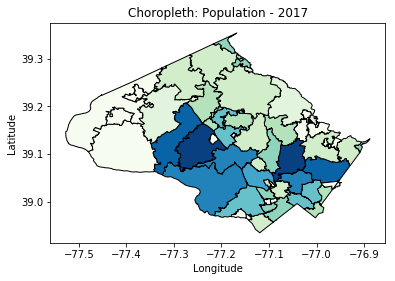

In [88]:
ay = zipcodes.plot(column = 'Population', cmap = "GnBu", scheme = 'equal_interval', k = 10, legend = False,figsize = (6,12),edgecolor = 'black')
ay.set_title("Choropleth: Population - 2017")
ay.set_xlabel("Longitude")
ay.set_ylabel("Latitude")
fig = ay.get_figure()
fig.savefig("!!population")

In [68]:
print(p)

                  mail_city    shape_area     shape_leng  \
zipcode                                                    
20705.0          BELTSVILLE  3.351064e+05     567.139544   
20707.0              LAUREL  2.168969e+07   35463.305152   
20777.0            HIGHLAND  5.649432e+06   15733.912221   
20812.0           GLEN ECHO  9.811019e+06   14504.506513   
20814.0            BETHESDA  1.169135e+08   58373.863054   
20815.0         CHEVY CHASE  1.518148e+08   78258.270285   
20816.0            BETHESDA  1.175655e+08   58716.124845   
20817.0            BETHESDA  4.036649e+08  143234.920079   
20818.0          CABIN JOHN  3.599683e+07   31103.235156   
20832.0               OLNEY  2.767251e+08  128344.128712   
20833.0         BROOKEVILLE  5.585343e+08  207931.092330   
20837.0         POOLESVILLE  1.193865e+09  179480.321022   
20838.0         BARNESVILLE  8.121113e+07   65358.201384   
20839.0         BEALLSVILLE  1.475366e+08   76366.519320   
20841.0               BOYDS  7.723518e+0

In [70]:
print(uzip)

             mail_city    shape_area  zipcode     shape_leng  \
92          BELTSVILLE  1.661674e+04  20705.0     567.139544   
43              LAUREL  2.168969e+07  20707.0   35463.305152   
57            HIGHLAND  5.649432e+06  20777.0   15733.912221   
93             ADELPHI  7.965229e+06  20783.0   17070.357631   
0            GLEN ECHO  9.810937e+06  20812.0   14504.506513   
24            BETHESDA  6.854070e+07  20814.0   58373.863054   
21         CHEVY CHASE  1.518139e+08  20815.0   78258.270285   
1             BETHESDA  1.175655e+08  20816.0   58716.124845   
27            BETHESDA  4.036649e+08  20817.0  143234.920079   
2           CABIN JOHN  3.599683e+07  20818.0   31103.235156   
62               OLNEY  2.767251e+08  20832.0  128344.128712   
76         BROOKEVILLE  5.585343e+08  20833.0  207931.092330   
58         POOLESVILLE  1.193865e+09  20837.0  179480.321022   
73         BARNESVILLE  8.121108e+07  20838.0   65358.201384   
70         BEALLSVILLE  1.475366e+08  20

In [78]:
ugh = [0 for x in range (0,len(zipcodes.index))]
i = 0
for index,row in zipcodes.iterrows():
    for index1,row1 in h.iterrows():
       # print(index1, row["zipcode"])
        if index1 == row["zipcode"]:
            ugh[i] = int(row1["House Price"])
            break
        else:
            ugh[i] = (0)
    i += 1
print (ugh)
zipcodes["House Price"] = ugh

[307600, 307600, 307600, 307600, 265408, 624258, 288858, 0, 0, 711750, 711750, 711750, 711750, 711750, 711750, 711750, 711750, 711750, 711750, 711750, 711750, 711750, 867991, 867991, 867991, 899833, 860516, 838500, 465375, 543941, 401508, 0, 0, 0, 594941, 402375, 402375, 402375, 551091, 356208, 421450, 421450, 421450, 429875, 878858, 464708, 580891, 554866, 0, 299866, 0, 428450, 361775, 284166, 284166, 335591, 334466, 334466, 334466, 523708, 523708, 523708, 294875, 294875, 294875, 294875, 294875, 0, 0, 514466, 257633, 0, 0, 0, 0, 0, 0, 600091, 600091, 600091, 600091, 0, 0, 420575, 380400, 353391, 396708, 465150, 320966, 536116, 489900, 0, 379600, 389100, 389100, 389100, 494125]


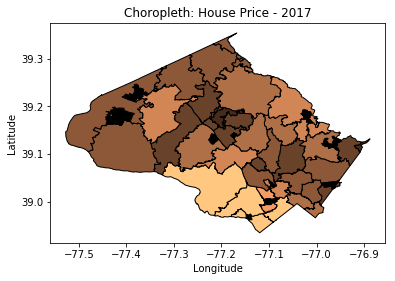

In [87]:
ay = zipcodes.plot(column = 'House Price', cmap = "copper", scheme = 'equal_interval', k = 10, legend = False,figsize = (6,12),edgecolor = 'black')
ay.set_title("Choropleth: House Price - 2017")
ay.set_xlabel("Longitude")
ay.set_ylabel("Latitude")
fig = ay.get_figure()
fig.savefig("!!house pirce")

In [40]:
new = r1
new = new.drop(columns=["mail_city","shape_area","shape_leng","geometry","House Price","Population","crime/pop","density"])
ugh = []
ughh = []
for index,row in r1.iterrows():
    ugh.append([row["Gray_ratio"]])
    ughh.append(row["Crime Frequency"])
from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_validate
lm = linear_model.LinearRegression()
X = np.array(ugh)
y = np.array(ughh)
kf = KFold(len(X), n_folds=10, shuffle = True)
len(kf)
print(kf)
lasso = linear_model.Lasso()
cross_validate(lasso, X, y, cv = kf,scoring=('r2', 'neg_mean_absolute_error'))

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


NameError: name 'linear_model' is not defined

In [ ]:
new = p
new = new.drop(columns=["mail_city","shape_area","shape_leng","geometry","House Price","Gray_ratio","crime/pop","density"])
ugh = []
ughh = []
for index,row in r1.iterrows():
    ugh.append([row["Population"]])
    ughh.append(row["Number of Crimes"])
from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_validate
lm = linear_model.LinearRegression()
X = np.array(ugh)
y = np.array(ughh)
kf = KFold(len(X), n_folds=10, shuffle = True)
len(kf)
print(kf)
lasso = linear_model.Lasso()
cross_validate(lasso, X, y, cv = kf,scoring=('r2', 'neg_mean_absolute_error'))

In [ ]:
{'fit_time': array([0.02797198, 0.0015552 , 0.00080371, 0.00066304, 0.00067091,
        0.00081992, 0.00044799, 0.00076175, 0.00072312, 0.0044241 ]),
 'score_time': array([0.00120211, 0.00119972, 0.00116515, 0.00152016, 0.00089407,
        0.00062585, 0.00087905, 0.00107503, 0.00129104, 0.00184107]),
 'test_r2': array([-1.06751591e+04, -4.94100313e+03, -3.14649173e+02, -3.08837121e+01,
        -1.88024147e+01, -6.04116206e+01, -7.55825030e+00, -8.57484359e+00,
        -2.00967035e+01, -2.24820354e+01]),
 'train_r2': array([0.5333965 , 0.54315577, 0.57054731, 0.56841288, 0.57640407,
        0.60179291, 0.58175984, 0.57910033, 0.55702906, 0.63072681]),
 'test_mean_squared_error': array([ -177651.28699904,  -310357.79627033,  -619379.43338088,
         -296753.18649021,  -185870.21700604,  -499389.47320843,
         -296014.90077801,  -596667.74868807, -2094284.26223886,
        -4819903.51638096]),
 'train_mean_squared_error': array([-773362.01785251, -759477.17418392, -723856.09656006,
        -759464.51535668, -770502.58589594, -734344.7810587 ,
        -745263.91690213, -718483.08530774, -607844.95671988,
        -377138.24060791])}

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()

cv_results = cross_validate(lasso, X, y, return_train_score=False)
sorted(cv_results.keys())                         

cv_results['test_score']    

scores = cross_validate(lasso, X, y,
                        scoring=('r2', 'neg_mean_squared_error'))
print(scores['test_neg_mean_squared_error'])      

print(scores['train_r2'])   

In [ ]:
print(lasso)

In [ ]:
print(y)

In [ ]:
print(X)

In [46]:
df2 = df.drop(columns = ["shape_area","shape_leng","geometry","density"])

In [ ]:
df2.to_csv("Zipcodes_with_crime.csv")

In [41]:
print (df)

                  mail_city    shape_area     shape_leng  \
zipcode                                                    
21770.0            MONROVIA  1.200666e+04     458.325717   
20880.0    WASHINGTON GROVE  5.128570e+04    1172.868704   
20705.0          BELTSVILLE  1.661674e+04     567.139544   
20777.0            HIGHLAND  5.649432e+06   15733.912221   
20896.0        GARRETT PARK  7.715220e+06   18896.062914   
21797.0            WOODBINE  1.351050e+07   19875.801746   
20899.0        GAITHERSBURG  2.501699e+07   22469.858743   
20993.0       SILVER SPRING  3.116114e+07   29796.941771   
20812.0           GLEN ECHO  9.810937e+06   14504.506513   
20707.0              LAUREL  2.168969e+07   35463.305152   
20894.0            BETHESDA  2.547457e+04    1298.401522   
20783.0             ADELPHI  7.965229e+06   17070.357631   
20839.0         BEALLSVILLE  1.475366e+08   76366.519320   
20838.0         BARNESVILLE  8.121108e+07   65358.201384   
20889.0            BETHESDA  1.078155e+0

In [42]:
z = ['20910', '20902', '20906', '20874', '20904', '20850', '20877', '20878', '20852', '20901', '20814', '20886', '20876', '20912', '20817', '20879', '20903', '20853', '20854', '20815', '20832', '20895', '20851', '20866', '20855', '20905', '20871', '20872', '20816', '20841', '20882', '20833', '20837', '20860', '20861', '20842', '20818', '20868', '20892', '20862', '21771', '20889', '20838', '20839', '20894', '20783', '20707', '20812', '20993', '20899', '20706', '21797', '20896', '20001', '21703', '20777', '20012', '20705', '20008', '20004']

In [43]:
gc = [['20874', '20852', '20854', '20868', '20706'], ['20906', '20904', '20877', '20814', '20899'], ['20912', '20705'], ['20814', '20886', '20815', '20894'], ['20902', '20832', '20838', '20012'], ['20902', '20874', '20814', '20876', '20895', '20816', '20838'], ['20886', '20854', '20707'], ['20842'], ['20902', '20832', '20837', '20783'], [], ['20906', '20904', '20001'], ['20872'], ['20874', '20814', '20854', '20816', '20839', '20812'], ['20902', '20882'], ['20842', '20812', '21797'], ['20910', '20812'], ['20886', '20896'], ['20906', '20871', '20706', '20001', '21703'], ['20993'], [], ['20910', '20906', '20850', '20852', '20814', '20815', '20895', '20818', '20892', '20812', '20001'], ['20812', '21797'], ['20871', '20868', '20812'], ['20874', '20905'], [], ['21797', '20896'], ['20876', '20868', '20705'], ['20894', '20004'], ['20876', '20860', '20707', '20812'], ['20878', '20854', '20895', '20855', '20861'], ['20838', '20706'], ['20839'], ['20832', '20993'], ['20889'], ['20902', '20878', '20855', '21797'], ['20902', '20839', '20812'], ['20705', '20008'], ['20854', '20871', '20841', '20833', '20838', '20993', '20896'], ['20874', '20886', '20854', '20894', '20783', '20707'], ['20886', '20841', '20868', '21771', '20889', '20838', '20707', '20899', '20706', '21797', '20896'], ['20839', '20896'], ['20839', '20812', '20777', '20004'], ['20854', '20777'], ['20910', '20850', '21771', '20889', '20004'], ['20874', '20895', '20842', '20705'], ['20874', '20852', '20901', '20842', '20894', '20812', '21797'], ['20904', '20852', '20838', '20783', '21797', '20896'], ['20902', '20854', '20895', '20866', '20855', '20860', '20896', '20777'], ['20842', '20839', '20783', '20812', '21797'], ['20853', '20854', '20706', '20001', '21703'], ['20853', '20832', '20839', '20993', '20001', '21703'], ['20817', '20855', '20868', '20892', '20862', '20838', '20707', '20896'], ['20833', '20861', '21771', '21797'], ['20839', '20993'], ['20839', '20993', '20001'], ['20902', '20837', '20842', '20868', '20783', '20812', '20993'], [], ['20882', '20894'], ['20878', '20894', '20783', '20993'], ['20906', '20851', '20855', '20783', '20707']]


In [50]:
for i in range(0,len(z)):
    print(df2.loc[[float(z[i])]])
    for x in gc[i]:
        print(df2.loc[[float(x)]])
    print("")
    print("")
    print("")

             mail_city  Number of Crimes  House Price  Population  Gray_ratio  \
zipcode                                                                         
20910.0  SILVER SPRING              4490  536116.6667     37445.0    1.104927   

         crime/pop  
zipcode             
20910.0   0.119909  
          mail_city  Number of Crimes  House Price  Population  Gray_ratio  \
zipcode                                                                      
20874.0  GERMANTOWN              3443  284166.6667     57367.0    0.385607   

         crime/pop  
zipcode             
20874.0   0.060017  
         mail_city  Number of Crimes  House Price  Population  Gray_ratio  \
zipcode                                                                     
20852.0  ROCKVILLE              2533     421450.0     40365.0    1.009693   

         crime/pop  
zipcode             
20852.0   0.062752  
        mail_city  Number of Crimes  House Price  Population  Gray_ratio  \
zipcode                 

KeyError: 'None of [[20706.0]] are in the [index]'